# Part 1: Loading and Visualizing Data

## 1-1 Load Training Data

In [15]:
import scipy.io

data = scipy.io.loadmat("ex3data1.mat")
X = data["X"]
y = data["y"]

## 1-2 Setup Parameter

In [16]:
input_layer_size  = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 1 to 10   

## 1-3 Randomly select 1 data points to display

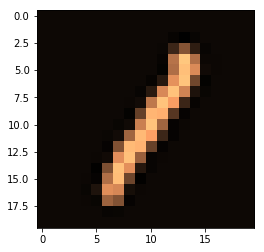

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt

# m:  the number  of train data 
# n:  the number of  input feature
m, n = X.shape

rand_indices = random.sample(range(0, m+1), m)
sel = X[rand_indices[0 : 1], :].reshape(20, 20)
tempsel = np.zeros([20, 20])
k = 0
for i in range(0, 20):
    for j in range(0, 20):
        tempsel[j, i] = sel[i, j]
plt.imshow(tempsel, cmap=plt.cm.copper)
plt.show()

# Part 2: Loading Pameters

In [18]:
print('Loading Saved Neural Network Parameters ...')

dataP = scipy.io.loadmat("ex3weights.mat")
Theta1 = dataP["Theta1"]
Theta2 = dataP["Theta2"]

Loading Saved Neural Network Parameters ...


# Part 3: Implement Predict

## 3-1 The implementation of sigmoid function

In [19]:
def sigmoid(z):
    return 1 / (1 +np.exp(-z))

## 3-2 The implementation of Predict Function

In [25]:
def predict(X, theta1, theta2):
    # m equal to the number of example and n equal to the number of feature
    m, n = X.shape
    # output labels
    p = np.zeros([m, 1])
    hidden_layer = sigmoid(np.dot(np.hstack((np.ones([m, 1]), X)), theta1.T))
    output_layer = sigmoid(np.dot(np.hstack((np.ones([m, 1]), hidden_layer)), theta2.T))
    _, p = np.where(output_layer==np.array([np.max(output_layer, axis=1)]).T)
    return p +1

## 3-3 Test for predict function

In [28]:
from sklearn.metrics import classification_report
pred = predict(X, Theta1, Theta2)
print(classification_report(y, pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       500
           2       0.98      0.97      0.98       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.97      0.98      0.98       500
           6       0.98      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

   micro avg       0.98      0.98      0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

